IOU è una metrica di valutazione che viene utilizzata per misurare l'accuratezza della prediction di un Object Detector. <br>
E' utilizzata per la valutazione di un CNN Detector come R-CNN, Faster R-CNN e YOLO ma è irrilevante l'algoritmo utilizzato per la prediction (potrebbe essere anche un algoritmo di CV "tradizionale" come HOG + SVM Detector): è sufficiente che l'algoritmo utilizzato per la detection fornisca dei bounding boxes su cui applicare la metrica di valutazione.<br>
Per applicare IOU è necessario:
- un ground-truth bounding box (prodotto a mano)
- un bounding box predetto da un modello

Per calcolare IOU deve essere applicata la seguente formula


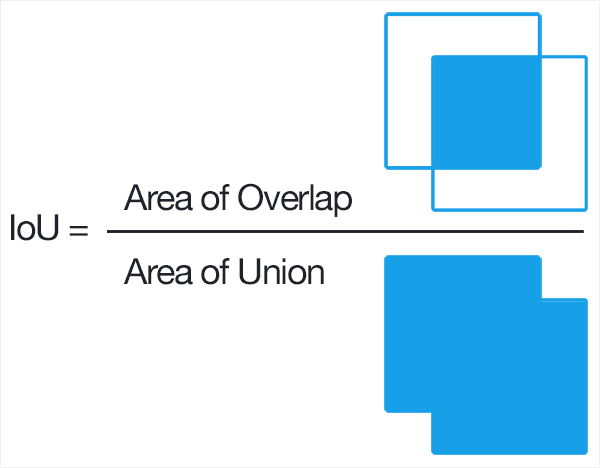

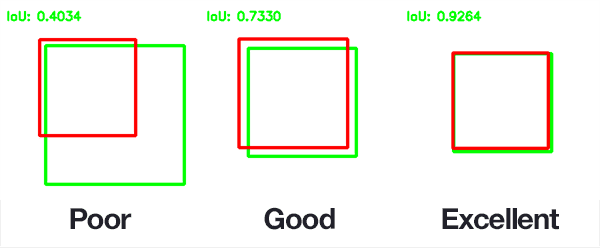

In [1]:
# import the necessary packages
from collections import namedtuple
import numpy as np
import cv2
# define the `Detection` object
Detection = namedtuple("Detection", ["image_path", "gt", "pred"])

Il metodo seguente implementa l'algoritmo IOU partendo da 2 bounding boxes passati come parametro (l'ordine è irrilevante).<br>
L'algoritmo è implementato utilizzando python e numpy. Ci sono altre implementazioni dell'algoritmo che utilizzano funzionalità del framework per velocizzare le prestazioni <br>
https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanIoU <br>
https://www.tensorflow.org/addons/api_docs/python/tfa/losses/GIoULoss

In [2]:
def bb_intersection_over_union(boxA, boxB):
    
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    # compute the area of intersection rectangle (rappresenta il numeratore della formula)
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    
    # compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

A titolo di esempio i bounding boxes sono forniti a mano. Normalmente verrebbero forniti da un object detector.

In [4]:
# define the list of example detections
examples = [
    Detection("data/car_side/image_0002.jpg", [39, 63, 203, 112], [54, 66, 198, 114]),
    Detection("data/car_side/image_0016.jpg", [49, 75, 203, 125], [42, 78, 186, 126]),
    Detection("data/car_side/image_0075.jpg", [31, 69, 201, 125], [18, 63, 235, 135]),
    Detection("data/car_side/image_0090.jpg", [50, 72, 197, 121], [54, 72, 198, 120]),
    Detection("data/car_side/image_0120.jpg", [35, 51, 196, 110], [36, 60, 180, 108])]

In [7]:
# loop over the example detections
for detection in examples:
    # load the image
    image = cv2.imread(detection.image_path)
    
    # draw the ground-truth bounding box along with the predicted
    # bounding box
    cv2.rectangle(image, tuple(detection.gt[:2]), tuple(detection.gt[2:]), (0, 255, 0), 2)
    cv2.rectangle(image, tuple(detection.pred[:2]), tuple(detection.pred[2:]), (0, 0, 255), 2)
    # compute the intersection over union and display it
    iou = bb_intersection_over_union(detection.gt, detection.pred)
    cv2.putText(image, "IoU: {:.4f}".format(iou), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    print("{}: {:.4f}".format(detection.image_path, iou))
    
   # show the output image
    cv2.imshow("Image", image)
    cv2.waitKey(0)

data/car_side/image_0002.jpg: 0.7980
data/car_side/image_0016.jpg: 0.7899
data/car_side/image_0075.jpg: 0.6125
data/car_side/image_0090.jpg: 0.9472
data/car_side/image_0120.jpg: 0.7310
